<a href="https://colab.research.google.com/github/DWA-GIT/TESI-UNIFACISA/blob/master/KMeans(N%C3%A3o_Supervisionado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando o seaborn


In [61]:
!pip install seaborn==0.9.0

Importações

In [0]:
import pandas as pd

In [63]:
uri_filmes = 'https://raw.githubusercontent.com/DWA-GIT/TESI-UNIFACISA/master/movies_novo.csv'
filmes = pd.read_csv(uri_filmes)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [64]:
filmes.shape

(9742, 3)

In [65]:
filmes.columns = ['filme_id', 'titulo', 'genero']
filmes.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
generos = filmes.genero.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.tail()


,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Transformar os dados (escalar)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

Usando clusters (KMeans)

In [68]:
from sklearn.cluster import KMeans

modelo = KMeans()

modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
print(f'Grupos {modelo.labels_}')

Grupos [5 5 4 ... 0 5 4]


In [70]:
print(generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [71]:
print(modelo.cluster_centers_)

[[-5.91799474e-02 -2.59985484e-02 -2.31077345e-01 -2.33435872e-01
  -2.39419792e-01 -7.69072857e-01 -3.73596589e-01 -2.17489438e-01
   7.57966238e-01 -1.90761392e-01 -9.49256298e-02 -3.34055205e-01
  -1.14937819e-01 -1.88418950e-01  5.78319130e-02  5.98847227e-02
  -1.79181786e-02  9.64194192e-02  3.56803162e-01  1.37747556e-01]
 [-5.91799474e-02 -4.56613450e-01 -3.44117571e-01 -2.29701601e-01
  -2.61158541e-01 -6.04474084e-01 -3.38988485e-01  4.59792443e+00
  -8.01342457e-01 -2.77541370e-01 -9.49256298e-02 -3.18469386e-01
   1.38548414e-03 -1.88418950e-01 -2.30079086e-01 -4.29978476e-01
  -3.34434762e-01 -4.79423626e-01 -5.72319427e-02 -1.14023007e-01]
 [-5.91799474e-02 -4.42264027e-01 -2.94254144e-02  5.93382404e-01
   7.27482768e-01  2.41300667e-01 -3.01723304e-01 -3.00631494e-02
  -2.01797062e-01  2.68148657e-01 -9.49256298e-02 -2.64315664e-01
   6.12253482e-02  5.30732180e+00 -1.86360551e-01  3.33943041e-01
  -2.54804713e-01 -4.68562752e-01 -1.71169228e-01  9.85955891e-02]
 [-5.91

In [72]:
modelo_novo = KMeans(n_clusters=20)
modelo_novo.fit(generos_escalados)
print(modelo_novo.cluster_centers_)



[[-5.91799474e-02  1.28484839e-01  2.49379987e-01 -1.83231498e-01
  -1.25281383e-01 -3.03543998e-01 -1.89026665e-01 -1.88127158e-01
  -1.89020544e-01 -1.59925982e-01 -9.49256298e-02 -1.92024676e-01
  -1.28397078e-01  1.46687193e-01 -1.72238723e-01 -1.13140890e-01
  -1.92533044e-01 -2.44737481e-01  1.12128553e-01  7.57200960e+00]
 [-5.91799474e-02 -2.47548818e-01 -2.88431813e-01 -2.58679155e-01
  -2.70451223e-01  1.26242494e+00 -3.74631584e-01 -2.17489438e-01
  -9.00246719e-01 -2.94809878e-01 -9.49256298e-02 -3.34055205e-01
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01 -4.42633460e-01
  -3.34434762e-01 -4.33778411e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91799474e-02 -3.15242684e-01 -3.51779573e-01 -2.58679155e-01
  -2.70451223e-01 -3.82395139e-01 -2.13046125e-01 -2.17489438e-01
  -5.88634440e-01 -2.10176845e-01 -9.49256298e-02  2.99351719e+00
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01 -3.76734946e-01
   2.80870168e-01  6.28963664e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91

Juntando os dados

In [73]:
grupos = pd.DataFrame(modelo_novo.cluster_centers_, 
                      columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
1,-0.059180,-0.247549,-0.288432,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.433778,-0.202020,-0.132065
2,-0.059180,-0.315243,-0.351780,-0.258679,-0.270451,-0.382395,-0.213046,-0.217489,-0.588634,-0.210177,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.376735,0.280870,0.628964,-0.202020,-0.132065
3,-0.059180,-0.202753,-0.286129,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.920411,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,0.015439,-0.202020,-0.132065
4,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
5,-0.059180,0.493114,-0.262933,-0.258679,-0.270451,-0.161449,2.669289,-0.217489,0.244178,-0.286104,-0.094926,-0.314412,-0.128397,-0.188419,-0.249986,-0.308658,-0.318734,0.681173,-0.202020,-0.132065
6,-0.059180,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
7,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
8,-0.059180,0.438123,0.509299,3.865793,-0.270451,-0.070056,-0.231259,-0.217489,-0.514066,0.680329,-0.094926,-0.189378,-0.128397,-0.188419,-0.095993,-0.256637,0.593068,-0.372241,-0.183353,-0.132065
9,-0.059180,0.404605,0.035718,-0.211943,-0.259210,-0.466192,-0.297025,-0.190207,0.751893,-0.253033,-0.094926,-0.305776,-0.128397,-0.188419,-0.213866,-0.052283,-0.240255,-0.197773,4.950012,-0.132065


Atendendo Diego (Mostrando algo)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf578dea58>,
      dtype=object)

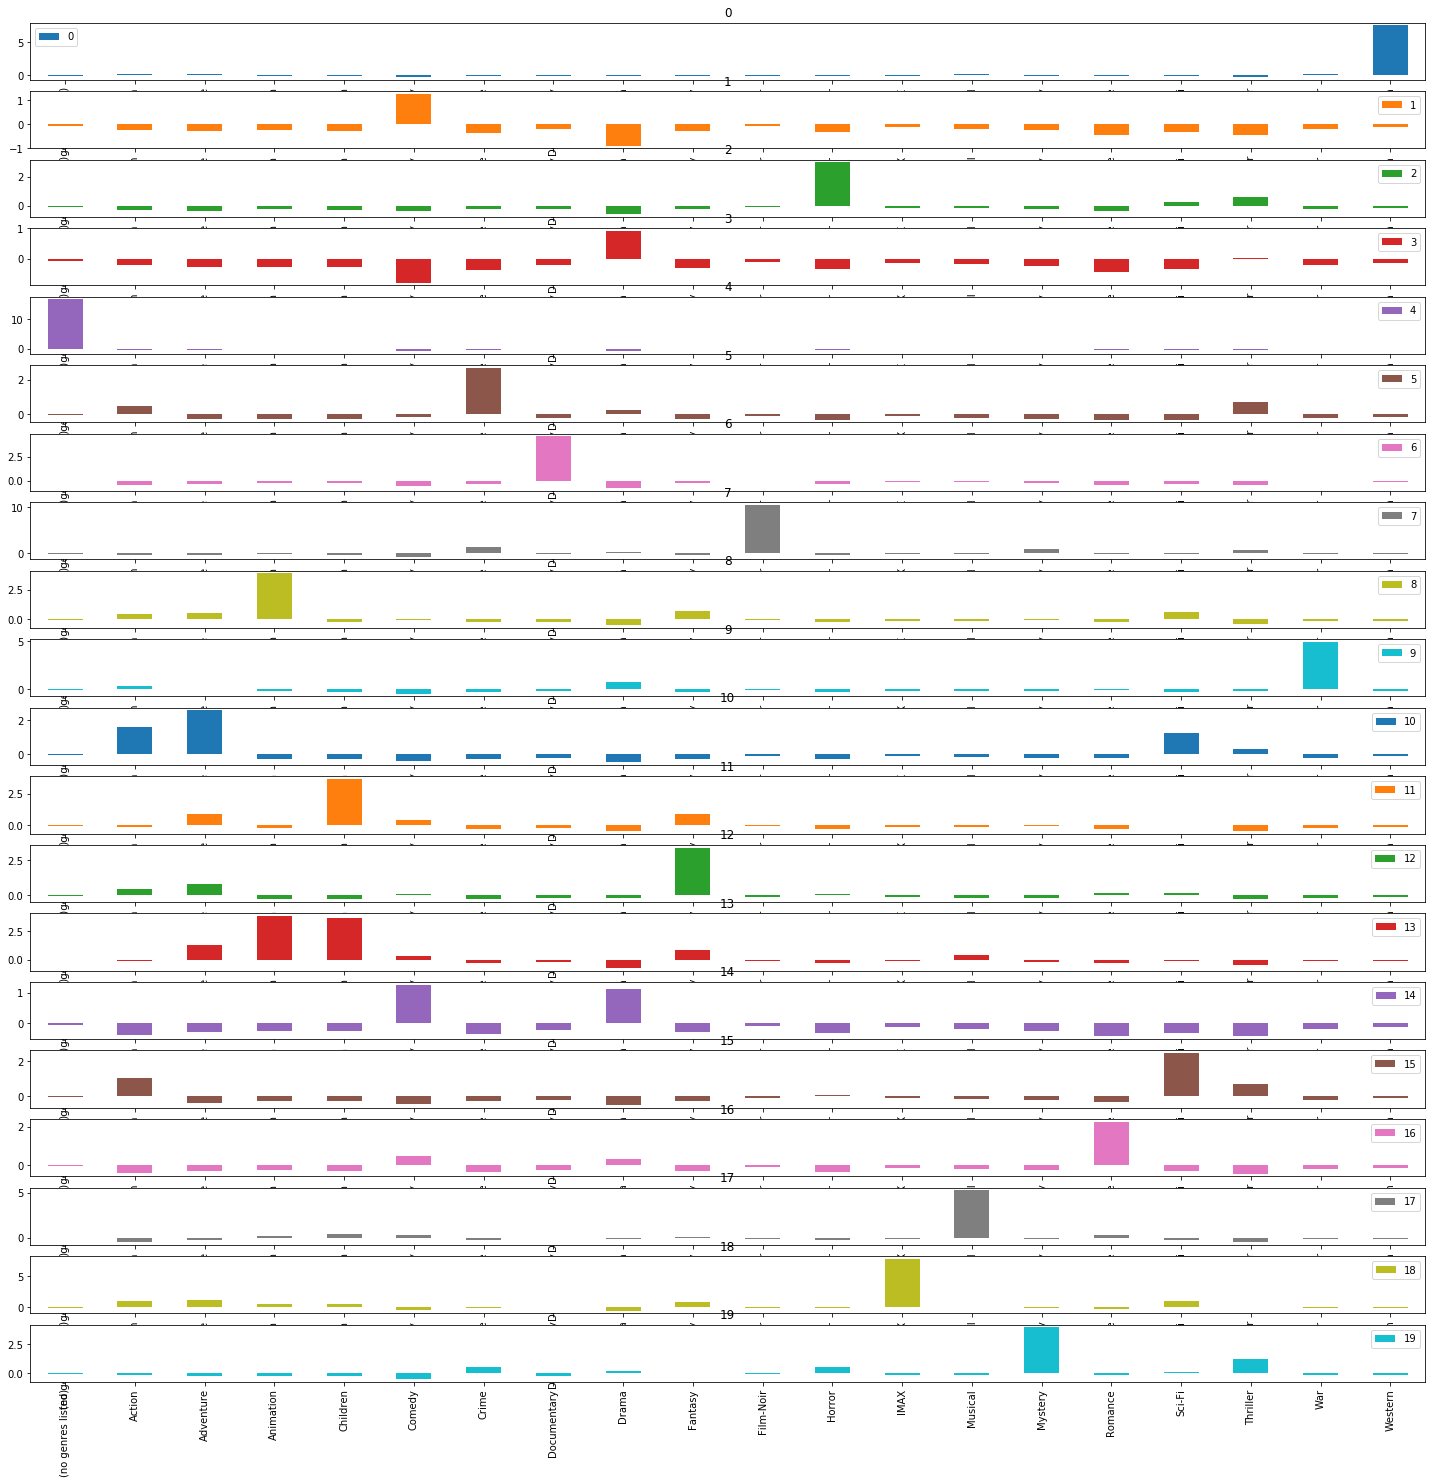

In [74]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,25),
                            sharex=False)

In [75]:
grupo = 0

filtro = modelo_novo.labels_ == grupos

novos_dados = dados_dos_filmes[filtro].sample(10)

novos_dados

ValueError: ignored